# Average ERP over trials per electrode

Author: peter<br>
Date: 2024<br>
<br>
Dataset: https://datadryad.org/stash/dataset/doi:10.5061/dryad.46786

Bieniek, Magdalena M.; Bennett, Patrick J.;
Sekuler, Allison B.; Rousselet, Guillaume A. (2015)<br>
Data from: A robust and representative lower bound on object
processing speed in humans [Dataset].<br>
Dryad. https://doi.org/10.5061/dryad.46786
<br>
Matlab v7.3 files are equivalent to hdf5 files.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [8]:
#import subprocess
#print(subprocess.check_output(['ls',  file_path, '-lhS']).decode('utf-8'))

In [ ]:
data_path = "/your absolute path to dataset here/"

file_path = data_path + "ftonsets_demographics/ftonsets_2ses.mat"

print(file_path)

f1=h5py.File(file_path, 'r')
sessions=f1["/"]
sessions.keys()
sessions['ftonsets_2ses'].shape   # (1, 120), an array of ones and zeros
session_list=sessions['ftonsets_2ses'][0]

In [ ]:
file_path = data_path + "ftonsets_demographics/ftonsets_onsets.mat"
print(file_path)
f2=h5py.File(file_path, 'r')
onsets=f2["/"]
onsets.keys()
onsets['onsets'][0][0]

### compute average ERP for each electrode over trials and save to hdf5 file

In [ ]:
# single-trial ERPs from 120 participants, 74 of whom were tested twice.
# so, 194 sessions total.
#
# Each participant was shown a face or noise (texture) image.
#
# participant 1, session 1.
# participant 1, session 2.
# participant 2, session 1,
# ...

n_participants=len(session_list)

for ii in range( 1 ):
    if session_list[ii] == 1:
        for jj in range(2):

            file_path = data_path + "ftonsets_erps/ftonsets_p%d_s%d.mat" % (ii+1, jj+1)
            print(file_path)
            
            f3 = h5py.File(file_path, 'r+')
            dataset=f3["/"]
            eeg_data = dataset["data"]

            est_onset_a = onsets['onsets'][0][ii]

            est_onset = eeg_data['onset_in_ms']
            est_onset = est_onset[0][0]

            print("onset list %0.1f  vs  eeg_data onset_in_ms %0.1f" % ( est_onset_a, est_onset  ))

            times = eeg_data["times"]
            x_times=times[:].flatten()
                                                  # trials,  time_pts, electrodes
            face_trials = eeg_data["face_trials"] # ~ (143,       451,      119)
            face_avg       = np.zeros( len(x_times) ) # 451
            face_avg_list  = []

            # for each paricipant
            #   for each session
            #     for each electrode
            #       calculate and store the avg ERP in its hdf5 file.

            num_electrodes = face_trials.shape[2] # <<<<<<<<<<<<<<<<<<<
            #num_electrodes=1

            print("face: electrode_num = %d ..." % 1 )
            for electrode_idx in range( num_electrodes ):
                face_avg = np.mean(face_trials[ :, :, electrode_idx ], axis=0)  # mean of each col
                face_avg = face_avg.reshape(1, -1)
                face_avg_list.append(face_avg)
            print("face: electrode_num = %d ..." % (electrode_idx + 1) )

            dataset_key = 'face_trials_avg'
            if dataset_key in eeg_data:
                del eeg_data[ dataset_key ]
            eeg_data["face_trials_avg"] = np.vstack(face_avg_list)

            ### noise
            noise_trials = eeg_data["noise_trials"]
            noise_avg = np.zeros( len(x_times) )
            noise_avg_list = []

            num_electrodes = noise_trials.shape[2] # <<<<<<<<<<<<<<<<<
            #num_electrodes=1

            print("noise: electrode_num = %d ..." % 1 )
            for electrode_idx in range( num_electrodes ):
                noise_avg = np.mean(noise_trials[ :, :, electrode_idx ], axis=0)

                noise_avg = noise_avg.reshape(1, -1)
                noise_avg_list.append(noise_avg)
            print("noise: electrode_num = %d ..." % (electrode_idx+1) )

            dataset_key = 'noise_trials_avg'
            if dataset_key in eeg_data:
                del eeg_data[ dataset_key ]
            eeg_data["noise_trials_avg"] = np.vstack(noise_avg_list)

            # 2d_array = np.vstack(noise_avg_list)
            # access each column:
            #   Example 2d_array[:,0] gets the first column,
            #   1 value from each electrode

            f3.close()

In [12]:
f1.close()
f2.close()

### check updated dataset, plot average ERPs for 2 electrodes, 2 sessions

<KeysViewHDF5 ['Ne', 'Nf', 'chanlocs', 'channeighbstructmat', 'clustermask', 'clustersum_treshold', 'face_trials', 'face_trials_avg', 'neighbourdist', 'neighbours', 'noise_trials', 'noise_trials_avg', 'onset_in_ms', 'times']>
  


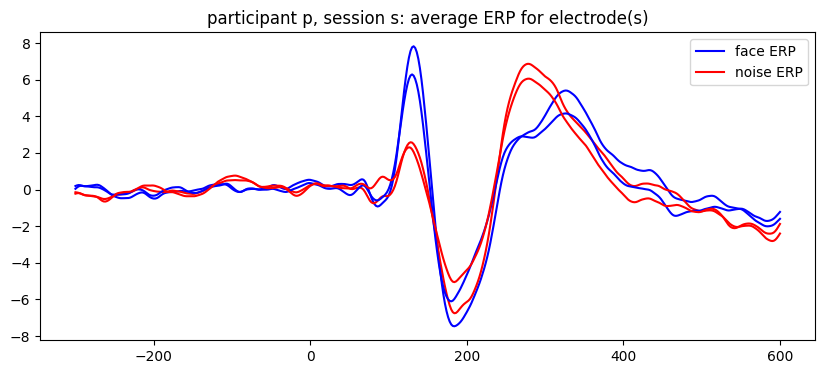

In [18]:
#### print(file_path)

f4 = h5py.File(file_path, 'r') 
dataset=f4["/"]
eeg_data = dataset["data"]

print( eeg_data.keys() )
print("  ")

# If you need to remove an element
# that was added due to a typo, for example.
#
# dataset_key = "face_trials_avg"
# if dataset_key in eeg_data:
#     del eeg_data[dataset_key]

face_avg  = eeg_data['face_trials_avg']
noise_avg = eeg_data['noise_trials_avg']

plt.figure(figsize=(10,4))

for ii in range( 2 ):  # len(face_avg) ):
    plt.plot(x_times, face_avg[ii],  'b', label="ERP")
    plt.plot(x_times, noise_avg[ii], 'r', label="noise")
plt.title("participant p, session s: average ERP for electrode(s)")
plt.legend(["face ERP", "noise ERP"])

f4.close()